In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TOPIC AND SENTIMENT INTENSITY + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 2 (80-10-10).csv')
df.head(5)

,Month,Tourist Arrival,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
0,01/01/2008,399556,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,...,18,20,0,32,0,8,98.4,53.3,109,Train
1,01/02/2008,411032,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,...,10,19,5,39,7,5,90.8,53.0,108,Train
2,01/03/2008,414332,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,...,38,28,6,30,0,0,89.5,53.4,106,Train
3,01/04/2008,395900,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,...,25,22,8,45,0,8,82.6,56.4,106,Train
4,01/05/2008,366387,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,...,16,22,5,47,0,9,79.8,57.2,106,Train


In [3]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [4]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(test.shape)

(148, 37)
(19, 37)


In [5]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [6]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(148, 35)
(148, 1)


In [7]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(19, 35)
(19, 1)


In [8]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(19, 35)
(19, 1)


<AxesSubplot:>

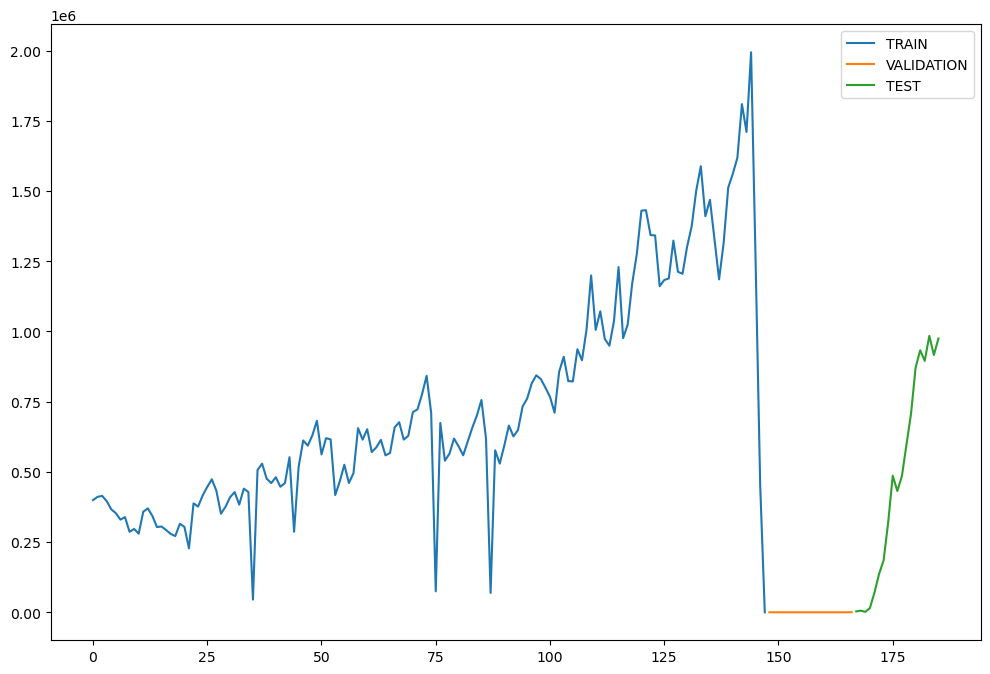

In [9]:
train['Tourist Arrival'].plot(legend=True, label='TRAIN')
validation['Tourist Arrival'].plot(legend=True, label='VALIDATION')
test['Tourist Arrival'].plot(legend=True, label='TEST', figsize=(12,8))

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 0.0001
model = SimpleExpSmoothing(train['Tourist Arrival']).fit(smoothing_level=alpha)
test_predictions = model.forecast(19).rename('SES Forecast')

In [11]:
from math import sqrt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [12]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

NameError: name 'y_pred' is not defined

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Text(0.5, 1.0, 'Tourist Arrivals Test and Predicted Data \n ETS - Time Series + Tripadvisors Index + Topic and Sentiment Intensity + Economic Index - Data Composition 2 (80-10-10)')

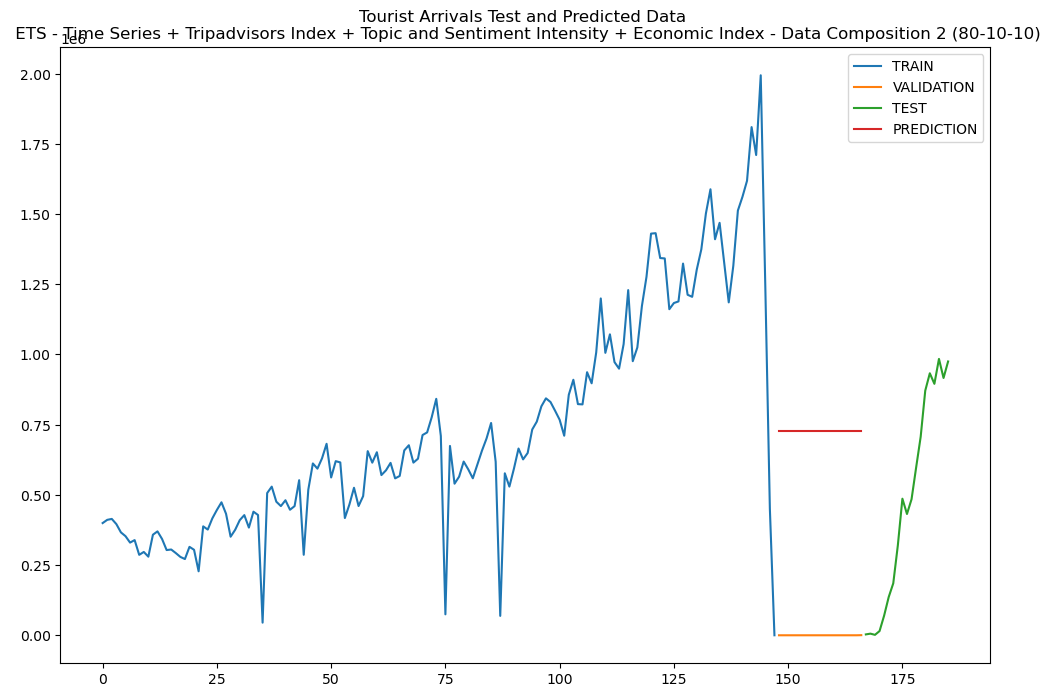

In [13]:
train['Tourist Arrival'].plot(legend=True, label='TRAIN')
validation['Tourist Arrival'].plot(legend=True, label='VALIDATION')
test['Tourist Arrival'].plot(legend=True, label='TEST', figsize=(12,8))
test_predictions.plot(legend=True, label='PREDICTION')
plt.title("Tourist Arrivals Test and Predicted Data \n ETS - Time Series + Tripadvisors Index + Topic and Sentiment Intensity + Economic Index - Data Composition 2 (80-10-10)")
